##                          Surendra kumar

##  IRIS FLOWER CLASSIFICATION
 We all know about Iris Dataset, and it contains features of different flower species. Independent features in this dataset are Sepal Length, Sepal Width, Petal Length, and Petal Width. All these lengths were in centimeters. And Dependent feature, which will be the output for the model, is Species. It contains the name of the species to which that particular flower with those measurements belongs.

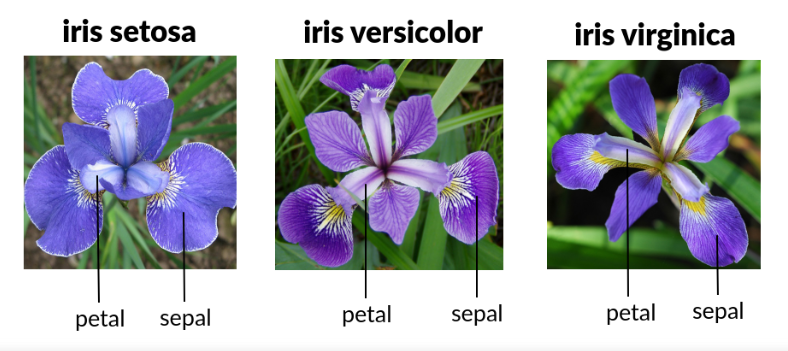

In [9]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Important Libraries 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from colorama import Fore, Back, Style 

# Loading the data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")


## Working with dataset

In [13]:
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
df.shape

(150, 6)

In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Droping unnecessary columns/Features

In [18]:
df=df.drop(columns=['Id'])

In [19]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Checking for null values

In [20]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Distribution of our data

Text(0.5, 1.0, 'Species')

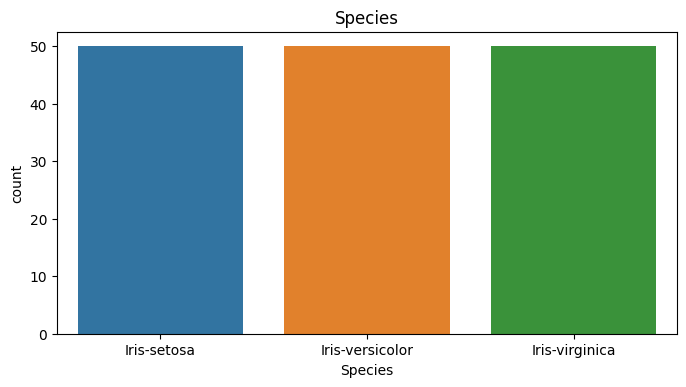

In [21]:
plt.figure(figsize=(8,4),dpi=100)
sns.countplot(data=df,x='Species')
plt.title("Species")

<Figure size 2500x400 with 0 Axes>

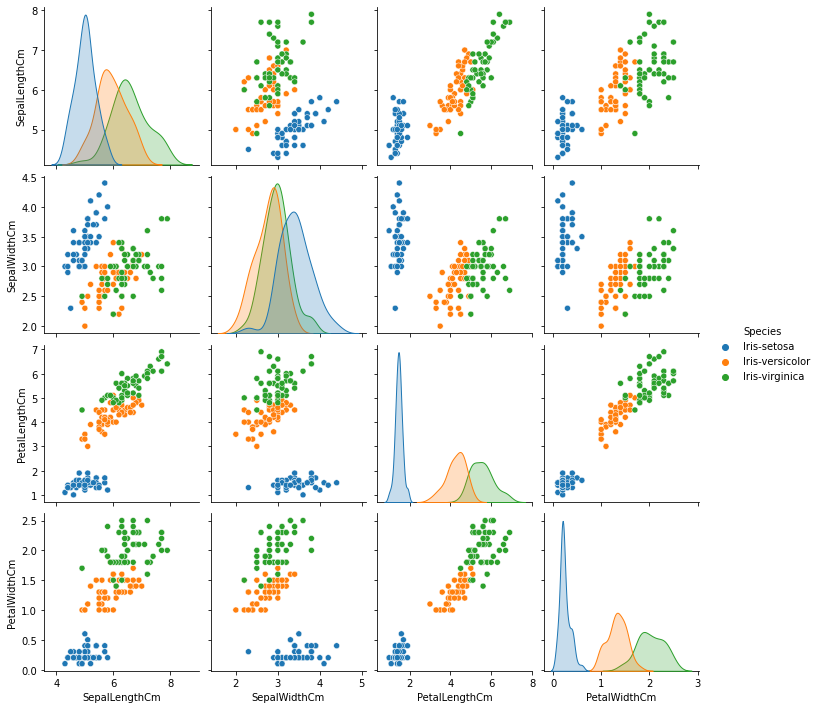

In [22]:
plt.figure(figsize=(25,4),dpi=100)
sns. pairplot(df,hue='Species')

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

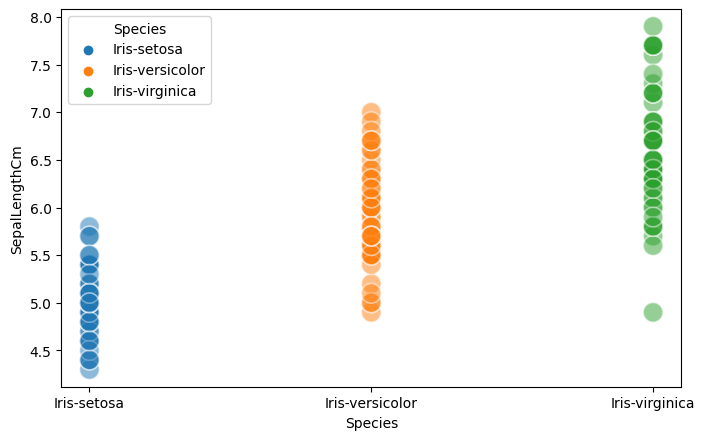

In [23]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Species',y='SepalLengthCm',data=df,s=200,alpha=0.5,hue='Species')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

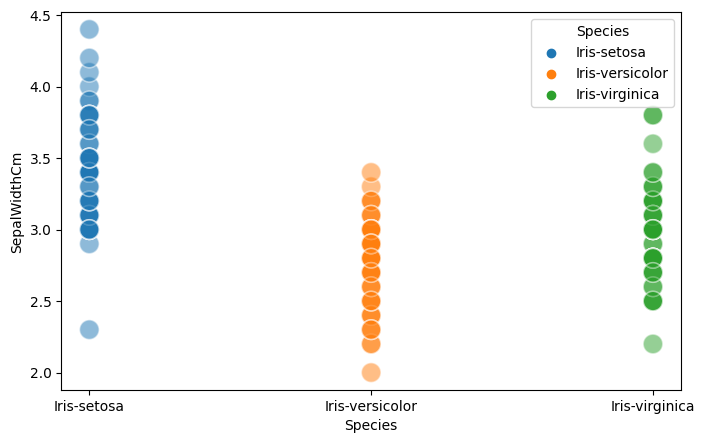

In [24]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Species',y='SepalWidthCm',data=df,s=200,alpha=0.5,hue='Species')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

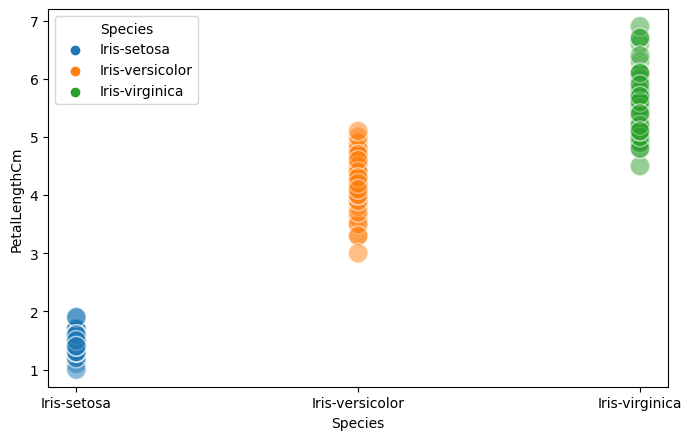

In [25]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Species',y='PetalLengthCm',data=df,s=200,alpha=0.5,hue='Species')


<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

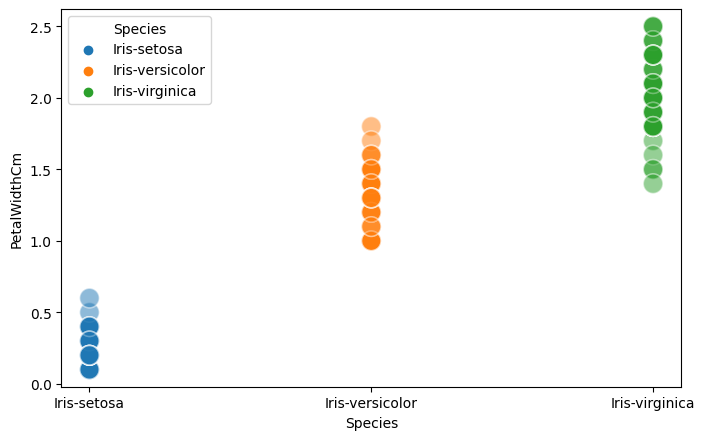

In [26]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x='Species',y='PetalWidthCm',data=df,s=200,alpha=0.5,hue='Species')

In [27]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

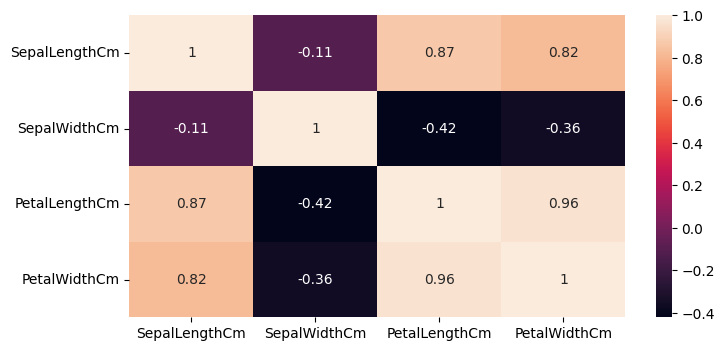

In [28]:
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(df.corr(),annot=True)

# Converting Species into numerical data
Now onwards we are using following convension for Species type:

*   Iris-setosa: 1
*   Iris-versicolor: 2
*   Iris-virginica: 3







In [29]:
df["Species"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}, inplace = True)

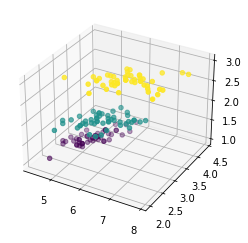

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'],df['Species'],c=df['Species'])

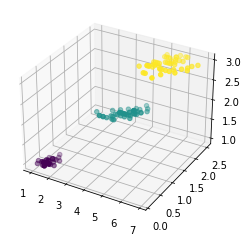

In [31]:
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'],df['Species'],c=df['Species'])

# Different Ml algorithms
Here in this project we are using three ml algorithms which are following:


1.   Logistic Regression.
2.   K-Nearest Neighbors(KNN).
3.   Support Vector Machine(SVM).

At the last we are using the only one algorithm which have highest accuracy for evaluating the result of our model. 


### Logistic Regression

In [32]:
Features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x = df[Features]
y = df["Species"]


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=50,stratify=df['Species'])

In [34]:
scaler=StandardScaler()

In [35]:
scaled_x_train=scaler.fit_transform(x_train)

In [36]:
scaled_x_test=scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
accuracy_list = []

In [39]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train, y_train)

LogisticRegression()

In [40]:
log_model.coef_

array([[-1.03829866,  0.99250769, -1.78339066, -1.67299847],
       [ 0.49017333, -0.34484267, -0.31605651, -0.63909371],
       [ 0.54812533, -0.64766502,  2.09944716,  2.31209218]])

In [41]:
y_pred= log_model.predict(scaled_x_test)
y_pred

array([1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3,
       2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 3, 2, 2, 2, 1, 2])

# Evaluation of logistic regression model

In [42]:
log_reg_acc = accuracy_score(y_test,y_pred)
accuracy_list.append(100*log_reg_acc)

In [43]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  97.37%


In [44]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
cmtest=confusion_matrix(y_test,y_pred)

Text(33.0, 0.5, 'actual value')

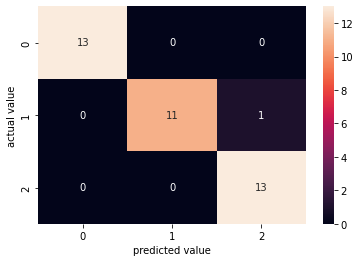

In [46]:
plt.figure(figsize=(6,4))
sns.heatmap(cmtest,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.92      0.96        12
           3       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
test_error_rates=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_knn_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_knn_pred_test)
    test_error_rates.append(test_error);

In [50]:
test_error_rates

[0.02631578947368418,
 0.07894736842105265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02631578947368418,
 0.052631578947368474,
 0.052631578947368474,
 0.02631578947368418,
 0.052631578947368474,
 0.052631578947368474,
 0.07894736842105265,
 0.052631578947368474,
 0.052631578947368474,
 0.13157894736842102,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053,
 0.1578947368421053]

In [51]:
knn_model=KNeighborsClassifier(n_neighbors=8)
knn_model.fit(scaled_x_train,y_train)
y_knn_pred=knn_model.predict(scaled_x_test)
knn_model.predict(scaler.transform([[5.1,3.5,1.4,0.2]]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

# Evaluation of KNN model

In [52]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [53]:
knn_acc =accuracy_score(y_test,y_knn_pred)
accuracy_list.append(100*knn_acc)

In [54]:
print(Fore.GREEN + "Accuracy of KNN is : ", "{:.2f}%".format(100*knn_acc))

Accuracy of KNN is :  100.00%


In [55]:
cmtest0=confusion_matrix(y_test,y_knn_pred)

Text(24.0, 0.5, 'actual value')

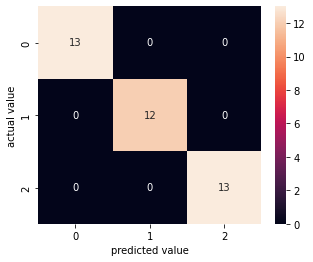

In [56]:
plt.figure(figsize=(5,4))
sns.heatmap(cmtest0,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

# 

## Support Vector Machine

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [58]:
grid=GridSearchCV(svm,param_grid)

In [59]:
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [60]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [61]:
svm_pred=grid.predict(scaled_x_test)

In [62]:
final_model=SVC(kernel='linear',C=1)
final_model.fit(scaled_x_train,y_train)

SVC(C=1, kernel='linear')

In [63]:
y_final_pred=final_model.predict(scaled_x_test)
y_final_pred

array([1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3,
       2, 2, 3, 2, 3, 2, 1, 1, 2, 1, 3, 2, 2, 2, 1, 2])

# Evaluation of SVM model

In [64]:
print(classification_report(y_test,y_final_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [65]:
svm_acc =accuracy_score(y_test,y_final_pred)
accuracy_list.append(100*svm_acc)

In [66]:
print(Fore.GREEN + "Accuracy of SVM is : ", "{:.2f}%".format(100*svm_acc))

Accuracy of SVM is :  100.00%


In [67]:
cmtest1=confusion_matrix(y_test,y_final_pred)

Text(51.0, 0.5, 'actual value')

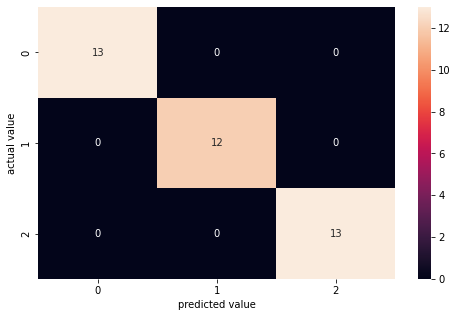

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(cmtest1,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [80]:
accuracy_list
Accuracy={'Logistic regression':accuracy_list[0],'KNN':accuracy_list[1],'SVM': accuracy_list[2]}


#Accuracy graph

<AxesSubplot:ylabel='count'>

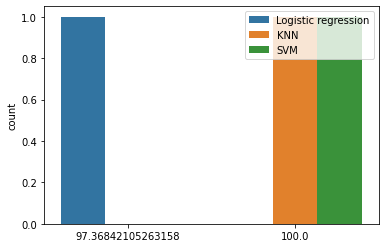

In [92]:
sns.countplot(x=accuracy_list,hue=['Logistic regression','KNN','SVM'])

# Final evaluation of our model
 Here we can see that Support Vector Machine gives us the highest accuracy for our model. So we will use the SVM model for predicting the result in our model.

## Saving the model

In [71]:
import pickle

In [72]:
with open('Iris_flower_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [73]:
final_model.predict(scaler.transform([[5.1,3.5,1.4,0.3]]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])